In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:09<00:00, 2213.49it/s]


R:
 [[4 2 None 1 5]
 [3 4 4 2 None]
 [1 None 5 4 5]
 [None 3 3 3 4]
 [2 5 5 None 3]]
P:
 [[ 1.35927095 -0.59902318 -0.15233437]
 [ 0.29251569  0.8683034  -0.05449467]
 [-0.3473298   0.31829543  1.68572475]
 [-0.23323469 -0.27474062  0.1694031 ]
 [ 0.37996917  1.58703737  0.63593811]]
Q:
 [[ 0.91026875 -0.09576478 -1.11794857]
 [-0.09351916  1.07463097  0.74464213]
 [ 0.58669268  0.83924958  0.76637029]
 [-1.0528273  -0.25392923  0.40155452]
 [ 0.77878534 -0.82966724  0.75730106]]
R':
 [[4.00051053 2.00247052 3.13160119 1.00116436 4.99813428]
 [2.99504173 3.96738584 4.02764145 2.00642741 3.23952536]
 [1.00109506 5.21329788 5.00559642 3.99981941 4.99670579]
 [2.43152168 3.01082372 2.98737386 2.99600815 4.00387979]
 [2.00382895 5.01558519 4.98115293 1.77897165 3.0040671 ]]
MSE Loss: 0.05374248673136776


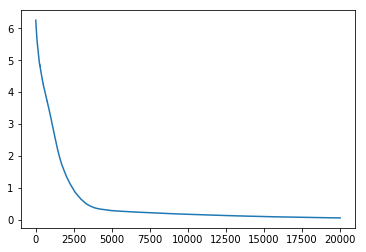

In [2]:
r = np.array([[4, 2, None, 1, 5], [3, 4, 4, 2, None], [1, None, 5, 4, 5], [None, 3, 3, 3, 4], [2, 5, 5, None, 3]])
m, u = r.shape
e = np.zeros((m, u))

k = 3
alpha = 0.001
beta = 0.001
iters = 20000

p = np.random.rand(m, k)
q = np.random.rand(u, k)

p1 = p.copy()
q1 = q.copy()

bias_p = np.zeros(m)
bias_q = np.zeros(u)
b = np.mean(r[np.where(r != None)])

bias_p1 = bias_p.copy()
bias_q1 = bias_q.copy()

loss = []
for n in tqdm(range(iters)):
    e = np.zeros((m, u))
    r1 = np.dot(p, q.T) + b + np.array([[i]*len(bias_p) for i in bias_p]) + np.array([[i]*len(bias_q) for i in bias_q]).T
    pairs = []
    for i in range(m):
        for j in range(u):
            if r[i][j] != None:
                e[i][j] = r[i][j]-r1[i][j]
                pairs.append((i, j))
    np.random.shuffle(pairs)
    for i, j in pairs:
        p1[i][:] = p[i][:] + alpha*(2*e[i][j]*q[j][:]-beta*p[i][:])
        q1[j][:] = q[j][:] + alpha*(2*e[i][j]*p[i][:]-beta*q[j][:])
        bias_p1[i] = bias_p[i] + alpha * (e[i][j] - beta * bias_p[i])
        bias_q1[j] = bias_q[j] + alpha * (e[i][j] - beta * bias_q[j])
    p = p1.copy()
    q = q1.copy()
    bias_p = bias_p1.copy()
    bias_q = bias_q1.copy()
    loss.append(np.sqrt(np.sum(e**2)))

print('R:\n', r)
print('P:\n', p)
print('Q:\n', q)
print('R\':\n', np.dot(p, q.T) + b + np.array([[i]*len(bias_p) for i in bias_p]) + np.array([[i]*len(bias_q) for i in bias_q]).T)
print('MSE Loss:', loss[-1])
plt.plot(loss)